## Bank Churn Modelling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load data
df = pd.read_csv(r"C:\Users\SPK\Desktop\python\Bank_churn_modelling.csv",sep=";")
df.shape

(10000, 14)

## Data Exploration

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# unwanted column - rownumber, customerid, surname

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [7]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.skew()

RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

## Data Cleaning

In [10]:
# check for duplicates
df.duplicated().sum()

0

In [11]:
# check for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
# drop the unwanted columns
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [13]:
# check for outliers
df.skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

## Feature Engineering

## Feature Engineering
- EDA - Exploratory Data Analytics / Root Cause Analytics - Data Visualization

    - Univariate Analysis
    - Bivariate ANalysis
    - Multivariate Analysis

- Statistics based feature selection

    - Correlation Analysis
    - ANOVA
    - Chi Square test


EDA - Exploratory Data Analytics / Root Cause Analytics - Data Visualization
Univariate Analysis
- Analysing one variable at a time
- Categorical - Discrete Freuqnecy Distribution - Countplot
- Numeric - Continuous Frequency Distribution - histogram


In [14]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

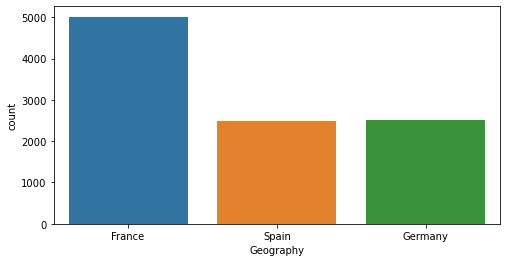

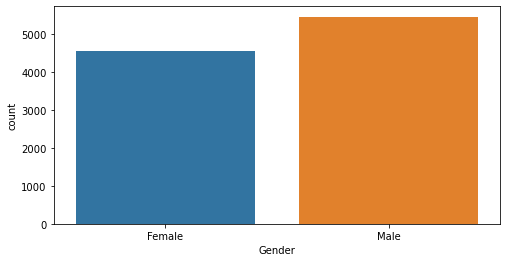

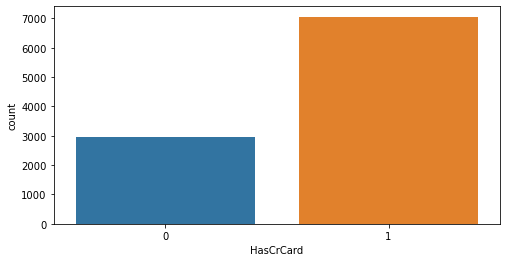

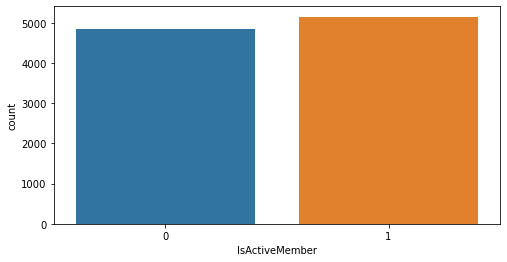

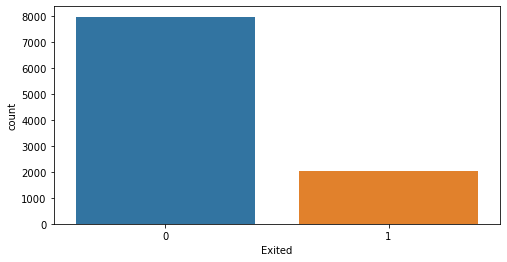

In [15]:
cats = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
for col in cats:
    plt.figure(figsize=(8,4))
    sns.countplot(df[col])
    plt.show()

Note :
- almost 50% of the customers are from france, and rest are from spain and germany
- the ratio of males and females are almost similar
- around 70% of customers have creditcards
- around 50% of customers are not using their ank account actively
- 20% customers left the bank

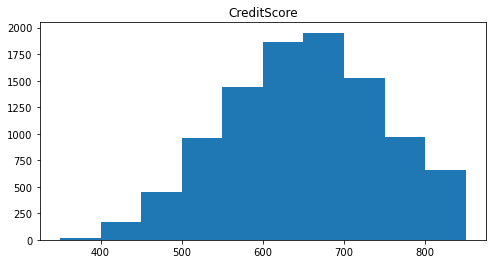

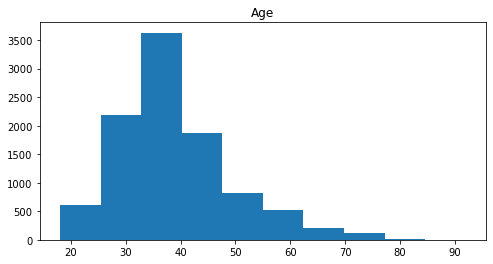

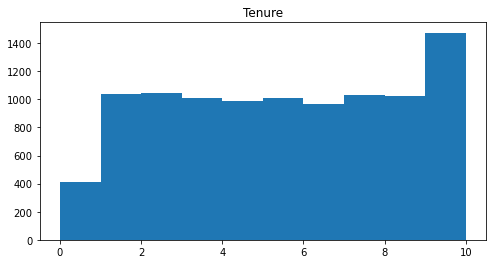

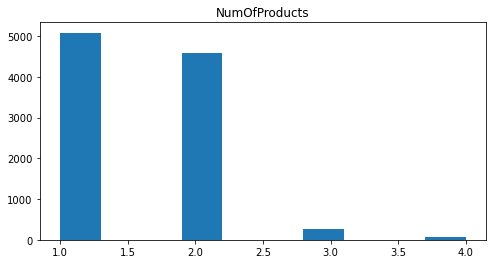

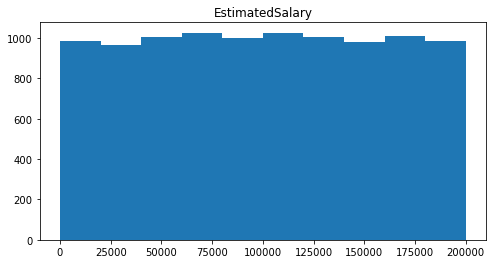

In [16]:
nums = ['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'EstimatedSalary']

for col in nums:
    plt.figure(figsize=(8,4))
    plt.hist(df[col])
    plt.title(col)
    plt.show()

Note :
- Most of the customers have creditsccore b/w 500 to 800
- most of the customer have age between 25 to 45
- tenure seems to have almost uniform distribution
- there are customers with 0 balance and then other group having balance between 75k to 175k
- most of customers have 1 or 2 products
- salary also has uniform distribution


## Bivariate Analysis

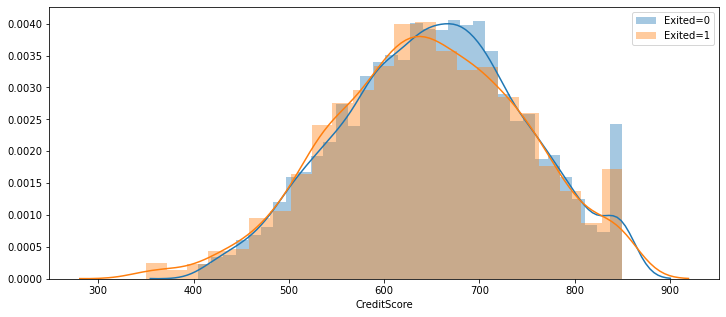

In [17]:
# Numeric v/s categorical - probability density distribution - distplot
# Creditscore v/s exited
plt.figure(figsize=(12,5))
sns.distplot(df['CreditScore'][df.Exited==0])
sns.distplot(df['CreditScore'][df.Exited==1])
plt.legend(['Exited=0','Exited=1'])
plt.show()

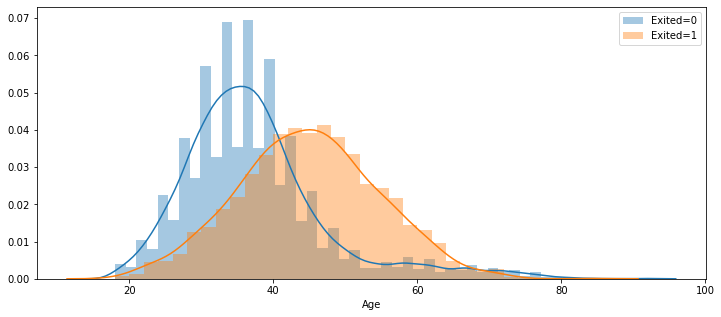

In [18]:
# Numeric v/s categorical - probabilty density distribution - distplot
# Age v/s exited

plt.figure(figsize=(12,5))
sns.distplot(df['Age'][df.Exited==0])
sns.distplot(df['Age'][df.Exited==1])
plt.legend(['Exited=0','Exited=1'])
plt.show()

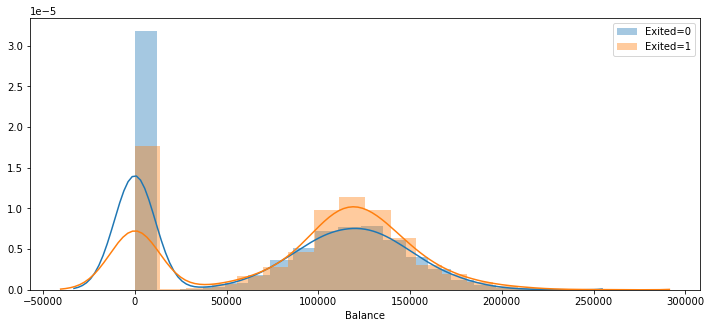

In [19]:
# Balance v/s Exited
plt.figure(figsize=(12,5))
sns.distplot(df['Balance'][df.Exited==0])
sns.distplot(df['Balance'][df.Exited==1])
plt.legend(['Exited=0','Exited=1'])
plt.show()

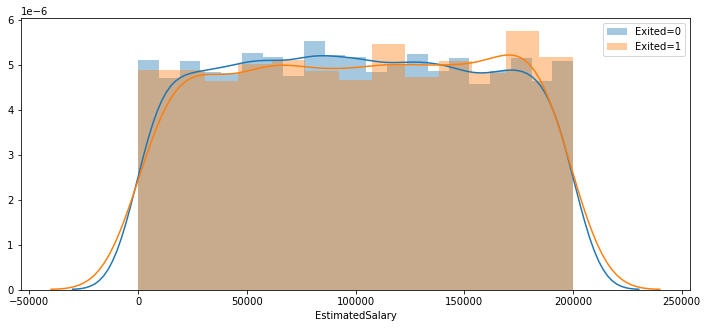

In [20]:
# EstimatedSalary vs exited
plt.figure(figsize=(12,5))
sns.distplot(df['EstimatedSalary'][df.Exited==0])
sns.distplot(df['EstimatedSalary'][df.Exited==1])
plt.legend(['Exited=0','Exited=1'])
plt.show()

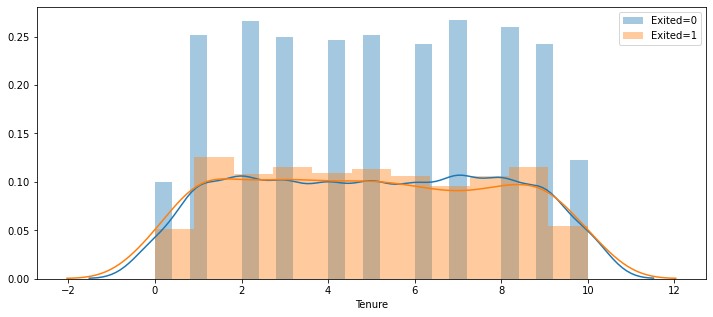

In [21]:
# Tenure v/s exited
plt.figure(figsize=(12,5))
sns.distplot(df['Tenure'][df.Exited==0])
sns.distplot(df['Tenure'][df.Exited==1])
plt.legend(['Exited=0','Exited=1'])
plt.show()

In [22]:
# Categorical vs categorical - pivot - distribution
# Geography v/s Exited
output = pd.crosstab(df.Geography,df.Exited,margins=True)
ratio = output[1]/output['All']
ratio

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
All        0.203700
dtype: float64

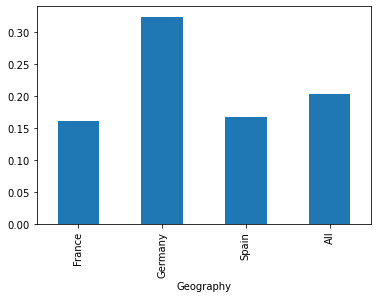

In [23]:
ratio.plot(kind='bar')
plt.show()

In [24]:
# Gender v/s  exited
output = pd.crosstab(df.Gender,df.Exited,margins=True)
ratio = output[1]/output['All']
ratio

Gender
Female    0.250715
Male      0.164559
All       0.203700
dtype: float64

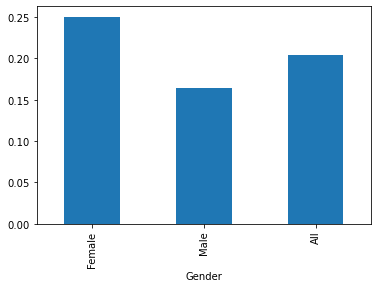

In [25]:
ratio.plot(kind='bar')
plt.show()

In [26]:
# HasCrCard v/s Exited
output = pd.crosstab(df.HasCrCard,df.Exited,margins=True)
ratio = output[1]/output['All']
ratio

HasCrCard
0      0.208149
1      0.201843
All    0.203700
dtype: float64

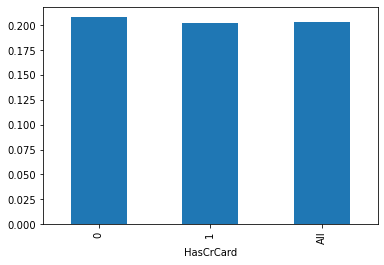

In [27]:
ratio.plot(kind='bar')
plt.show()

In [28]:
# IsActiveMember v/s Exited
output = pd.crosstab(df.IsActiveMember,df.Exited,margins=True)
ratio = output[1]/output['All']
ratio

IsActiveMember
0      0.268509
1      0.142691
All    0.203700
dtype: float64

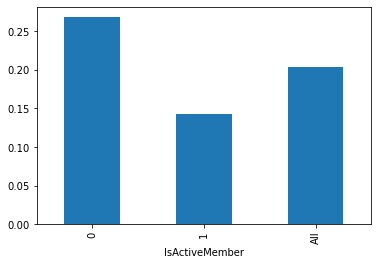

In [29]:
ratio.plot(kind='bar')
plt.show()

## Multivariate analysis

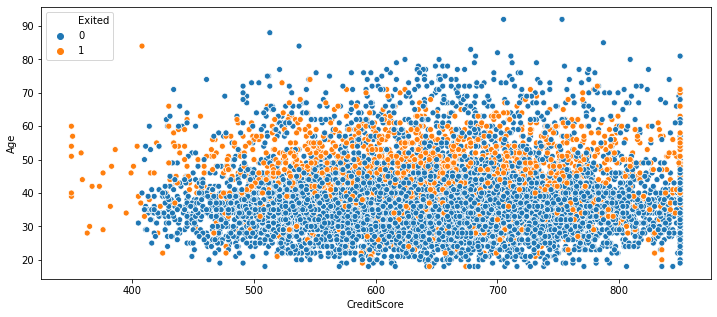

In [30]:
# categorical v/s numeric v/s numeric - scatterplot
# Exited v/s Creditscore v/s Age

plt.figure(figsize=(12,5))
sns.scatterplot(x='CreditScore',y='Age',hue='Exited',data=df)
plt.show()

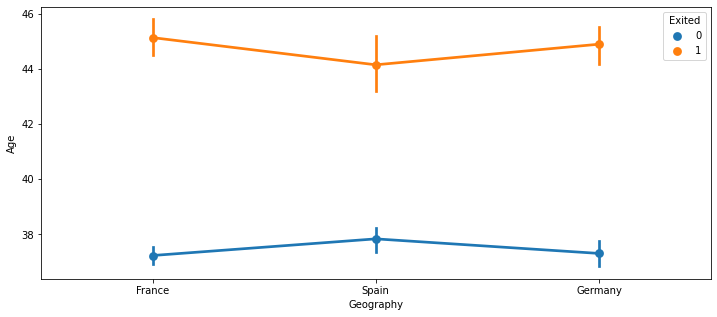

In [31]:
#Categorical v/s numeric v/s categorical - pointplant
#Georaphy v/s Age v/s Exited
#the dot is mean and the straight line is std deviation

plt.figure(figsize=(12,5))
sns.pointplot(x='Geography',y='Age',hue='Exited',data=df)
plt.show()

## Statistical methods

### Correlation Analysis

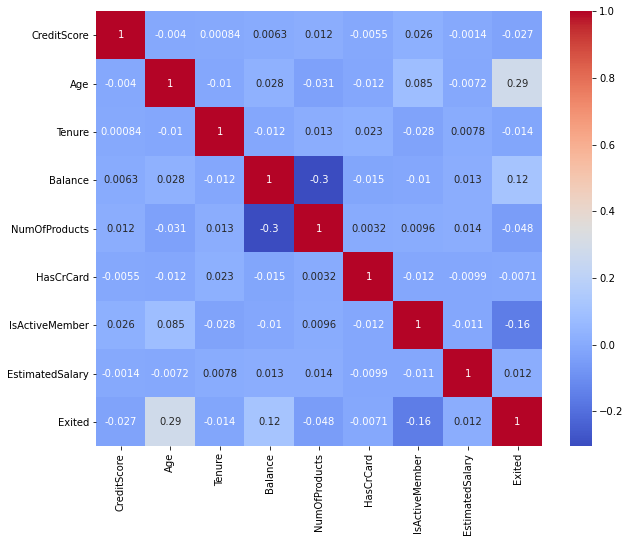

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [33]:
# Important features - Age, Balance, IsActiveMember

#### ANOVA - Analysis of variance
 - used to compare the means of two or more groups
 - in our case we can use this technique for a numeric feaure - 
 - for example - creditscore - we can compare mean of creditscore of customers who left the bank with mean of creditscore of customers who did not leave the bank
 
 - Null Hypothesis = Means of two or more groups are similar
 - Alternate Hypothesis = Means of two or more groups are different
 
     - ANOVA - F test
        - if business confidence = 95% = 0.95, alpha = 1-0.95 = 0.05
        
              - if pvalue > alpha = accept Null Hypothesis = feature is not important
              - if pvalue < alpha = reject Null Hypothesis = feature is important


In [34]:
nums = ['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'EstimatedSalary']
xd = df[nums]
yd = df['Exited']
from sklearn.feature_selection import f_classif
fvalue,pvalue = f_classif(xd,yd)

for i in range(len(nums)):
    print(nums[i], pvalue[i])


CreditScore 0.006738213892258643
Age 1.2399313093415039e-186
Tenure 0.1615268494952801
NumOfProducts 1.7173330048040421e-06
EstimatedSalary 0.22644042802376574


#### Chi Square test
- used to compare the distribution of a categorical attribute between two or more groups
- for example - it can be used to compare the distribution of male:female for customer who left and customers who did not leave

      - Null Hypothesis = dsitrbution of categories in two or more groups is similar
      - Alternate Hypothesis = distribution of categories in two or more groups is different
      
      if business confidence = 95% i.e. alpha = 1-0.95 = 0.05
      - if pvalue > alpha = accept the NUll HYPOTHESIS - feature is not important
      - of pvalue < alpha = reject the null hypothesis - features is imortant

    
        

In [35]:
cats = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
xd = df[cats]
yd = df['Exited']
xd.head()

,Geography,Gender,HasCrCard,IsActiveMember,Exited
0,France,Female,1,1,1
1,Spain,Female,0,1,0
2,France,Female,1,0,1
3,France,Female,0,0,0
4,Spain,Female,1,1,0


In [36]:
from sklearn.preprocessing import LabelEncoder
xd['Geography'] = LabelEncoder().fit_transform(xd['Geography'])
xd['Gender'] = LabelEncoder().fit_transform(xd['Gender'])

from sklearn.feature_selection import chi2
chival, pvalue = chi2(xd,yd)

for i in range(len(cats)):
    print(cats[i],pvalue[i])


Geography 0.0005756078382573235
Gender 7.015574513879596e-13
HasCrCard 0.6984962089530451
IsActiveMember 1.5680362405434552e-27
Exited 0.0


<ipython-input-36-1b82edbeb490>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xd['Geography'] = LabelEncoder().fit_transform(xd['Geography'])
<ipython-input-36-1b82edbeb490>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xd['Gender'] = LabelEncoder().fit_transform(xd['Gender'])


In [37]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [38]:
x = df[['CreditScore', 'Geography', 'Gender', 'Age','Balance',
       'NumOfProducts','IsActiveMember']]
y = df['Exited']

### 5.Preprocessing

In [39]:
x.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
0,619,France,Female,42,0.00,1,1
1,608,Spain,Female,41,83807.86,1,1
2,502,France,Female,42,159660.80,3,0
3,699,France,Female,39,0.00,2,0
4,850,Spain,Female,43,125510.82,1,1


In [40]:
# encoding on geography and gender
# scaling on balance, age, creditscore, numofproducts
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler

pipeline = ColumnTransformer([("ohe",OneHotEncoder(drop='first'),[1,2]),
                             ("sc",StandardScaler(),[0,3,4,5])],remainder='passthrough')

x2 = pipeline.fit_transform(x)
x2.shape

# pipeline is kind of like the format we want to apply, and the fit_transform lets it to be applied on which dataframe we want
# remainder is the parameter for ColumnTransformer


(10000, 8)

In [41]:
pd.DataFrame(x2).head()

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,-0.326221,0.293517,-1.225848,-0.911583,1.0
1,0.0,1.0,0.0,-0.440036,0.198164,0.117350,-0.911583,1.0
2,0.0,0.0,0.0,-1.536794,0.293517,1.333053,2.527057,0.0
3,0.0,0.0,0.0,0.501521,0.007457,-1.225848,0.807737,0.0
4,0.0,1.0,0.0,2.063884,0.388871,0.785728,-0.911583,1.0


In [42]:
#train test split
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts = train_test_split(x2,y,test_size=0.2,random_state=5)
print(x2.shape)
print(xtr.shape)
print(xts.shape)
print(y.shape)
print(ytr.shape)
print(yts.shape)

(10000, 8)
(8000, 8)
(2000, 8)
(10000,)
(8000,)
(2000,)


## Applying ML
ML trying to predict whether the customer is leaving


In [43]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [44]:
# train the model with the train dataset - xtr, ytr
model.fit(xtr,ytr)

LogisticRegression()

## Performance Analysis

In [45]:
# trying to make prediction for a single customer
# and the the resulrt of the single customer not leave the bank cause it 0
new_customer = [[650,'France','Male',52,150456,2,0]]
new_customer = pipeline.transform(new_customer)
model.predict(new_customer)

array([0], dtype=int64)

In [46]:
# accuracy - measure of exactness
ypred = model.predict(xts)
from sklearn import metrics
metrics.accuracy_score(yts,ypred)

0.8095

In [47]:
# recall
metrics.recall_score(yts,ypred)

0.19012345679012346

In [48]:
#precision
metrics.precision_score(yts,ypred)

0.5923076923076923

In [49]:
metrics.confusion_matrix(yts,ypred)

array([[1542,   53],
       [ 328,   77]], dtype=int64)

In [50]:
import joblib
joblib.dump(model,"model.pkl")
joblib.dump(pipeline,"pipeline.pkl")

['pipeline.pkl']